In [1]:
import numpy as np
import pandas as pd

# for warnings ignoring
import warnings
warnings.filterwarnings('ignore')

# visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%config InlineBackend.figure_format = 'retina'

In [3]:
# Getting the data

df = pd.read_csv('./data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## An initial work with data

In [5]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})

In [6]:
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

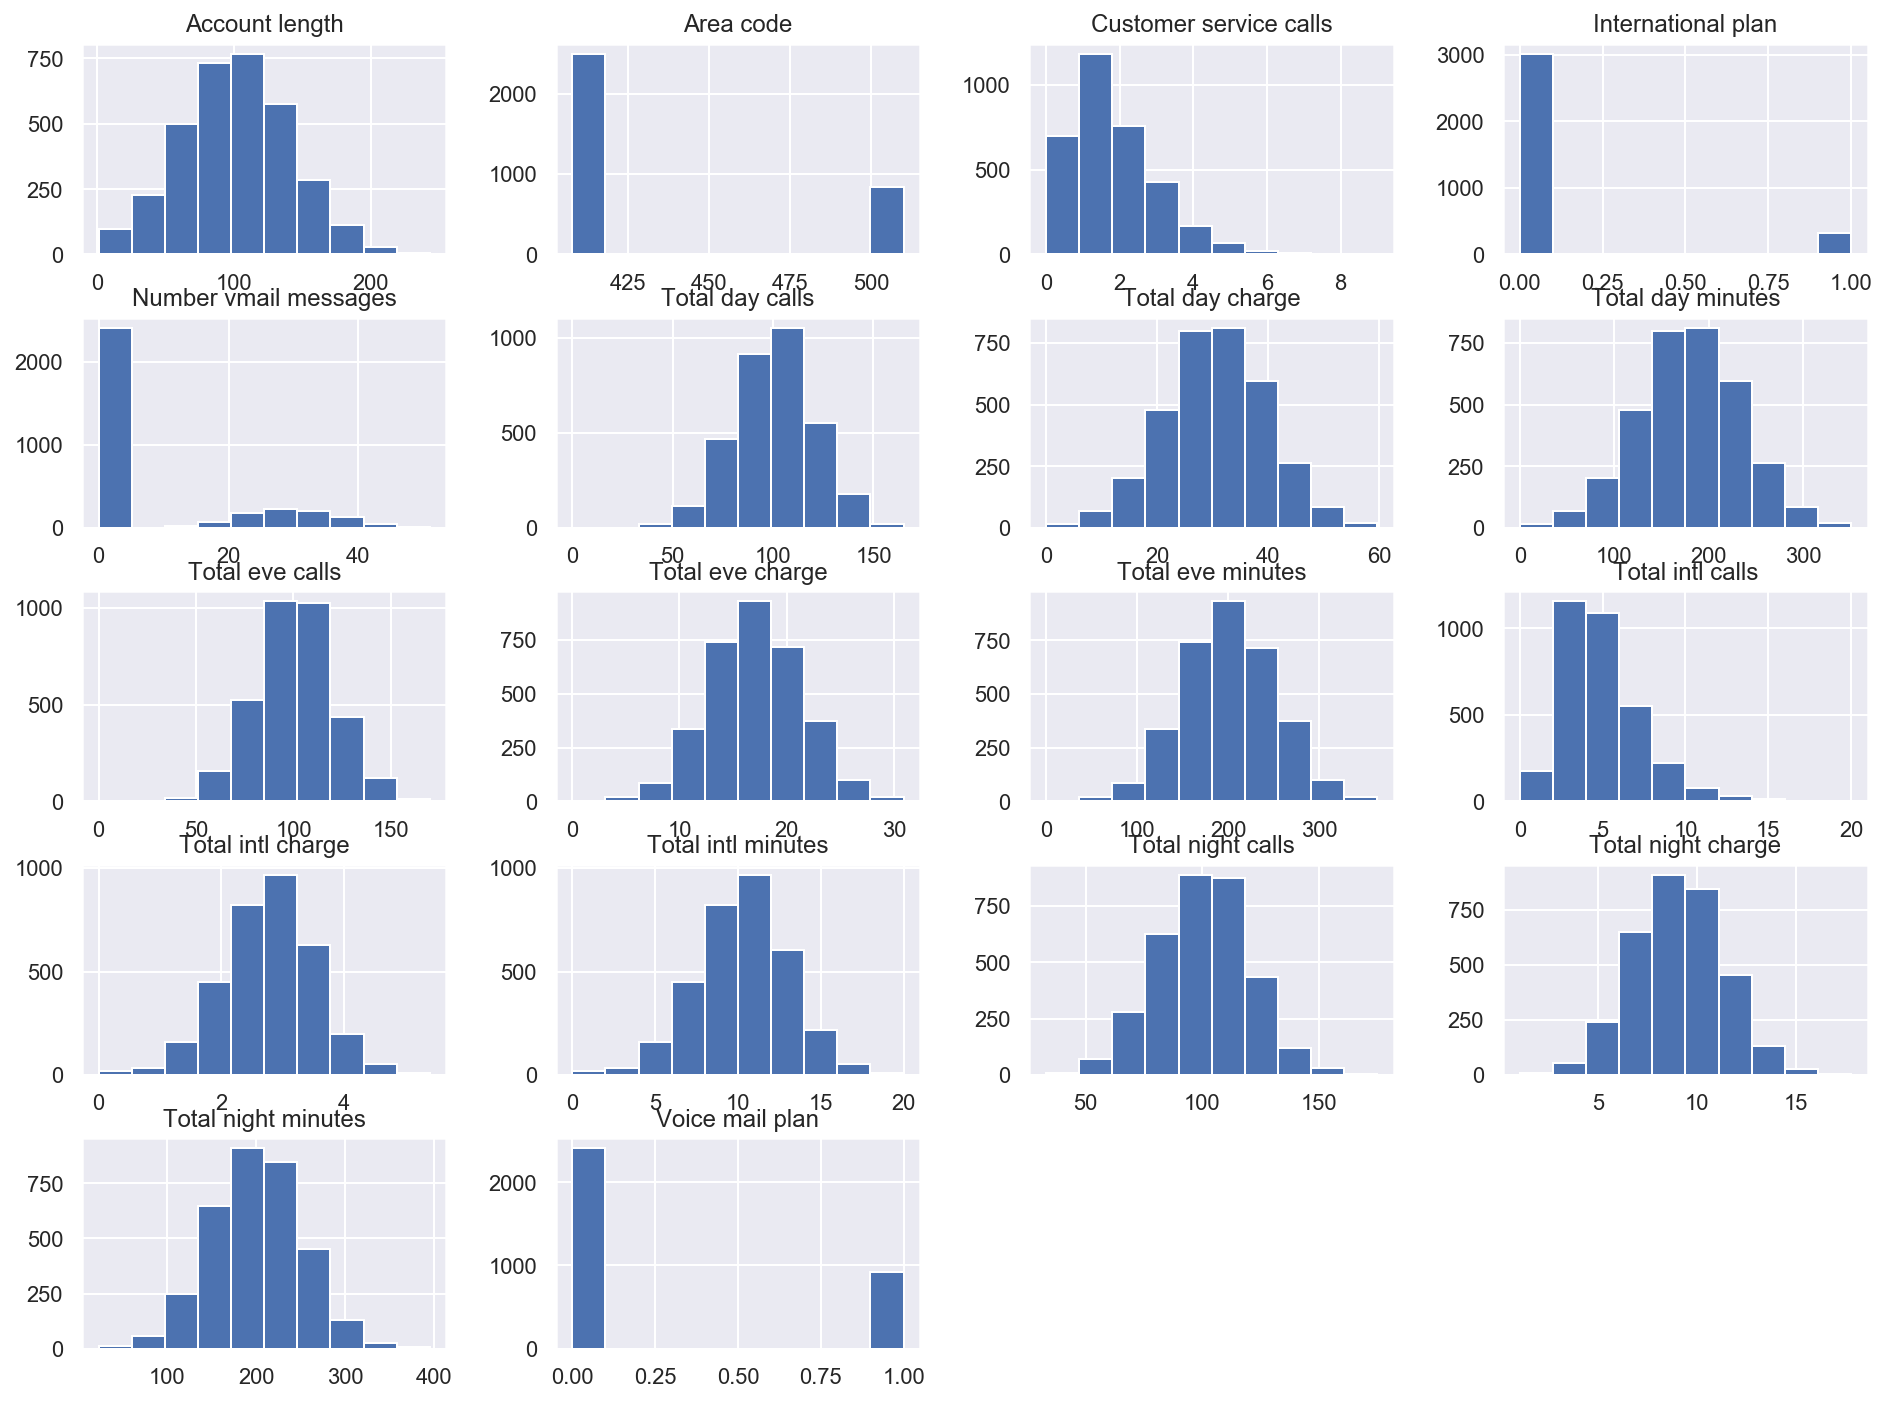

In [7]:
plt.rcParams['figure.figsize'] = (16, 12)
df.drop(['State', 'Churn'], axis=1).hist();  # histograms of all variables

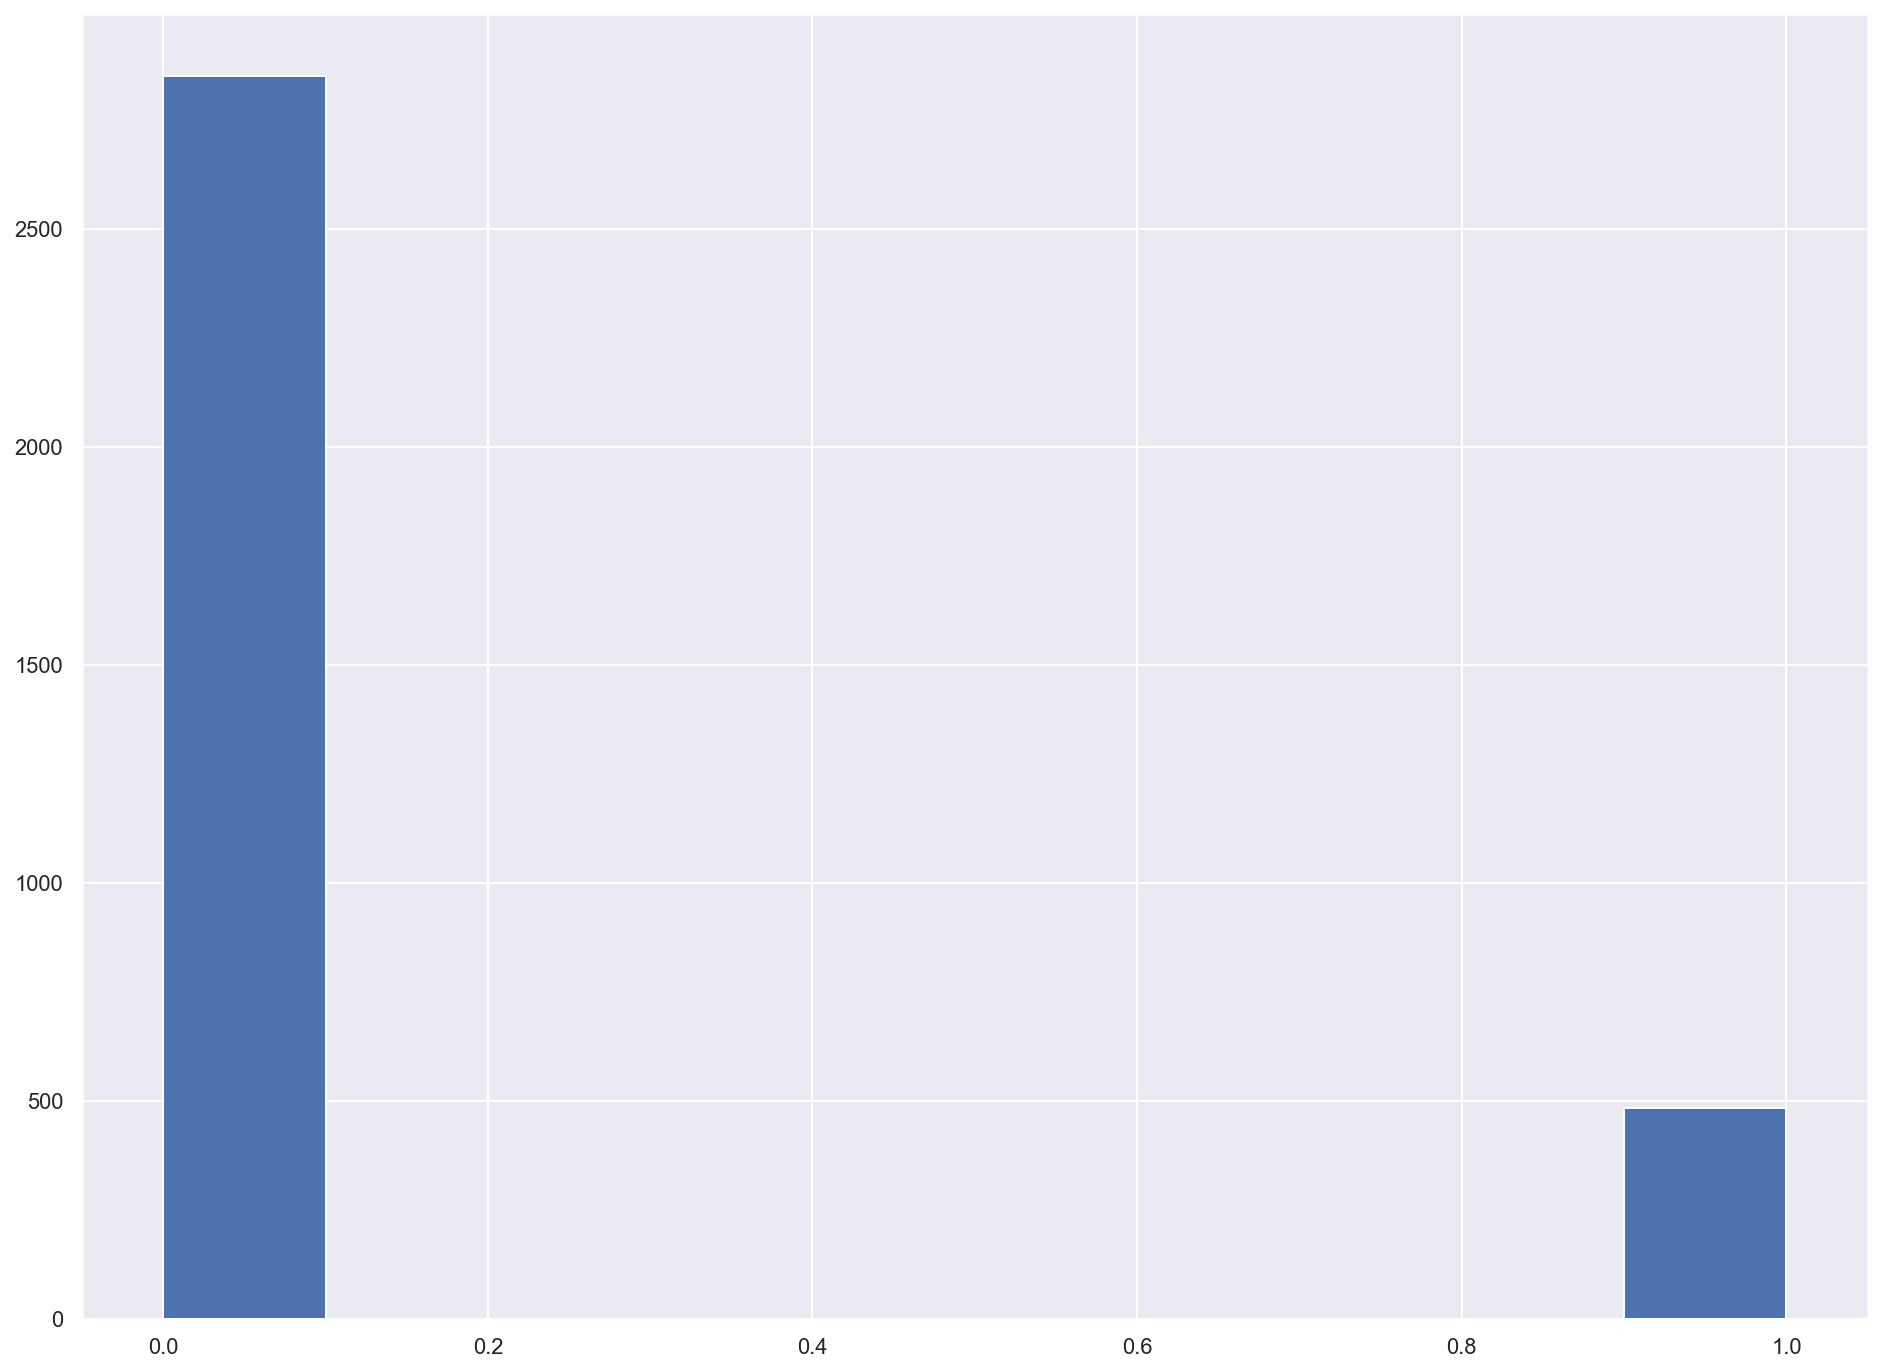

In [8]:
df['Churn'] = df['Churn'].astype(int)
df['Churn'].hist();

In [9]:
df.corr()  # Pirson correlation

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


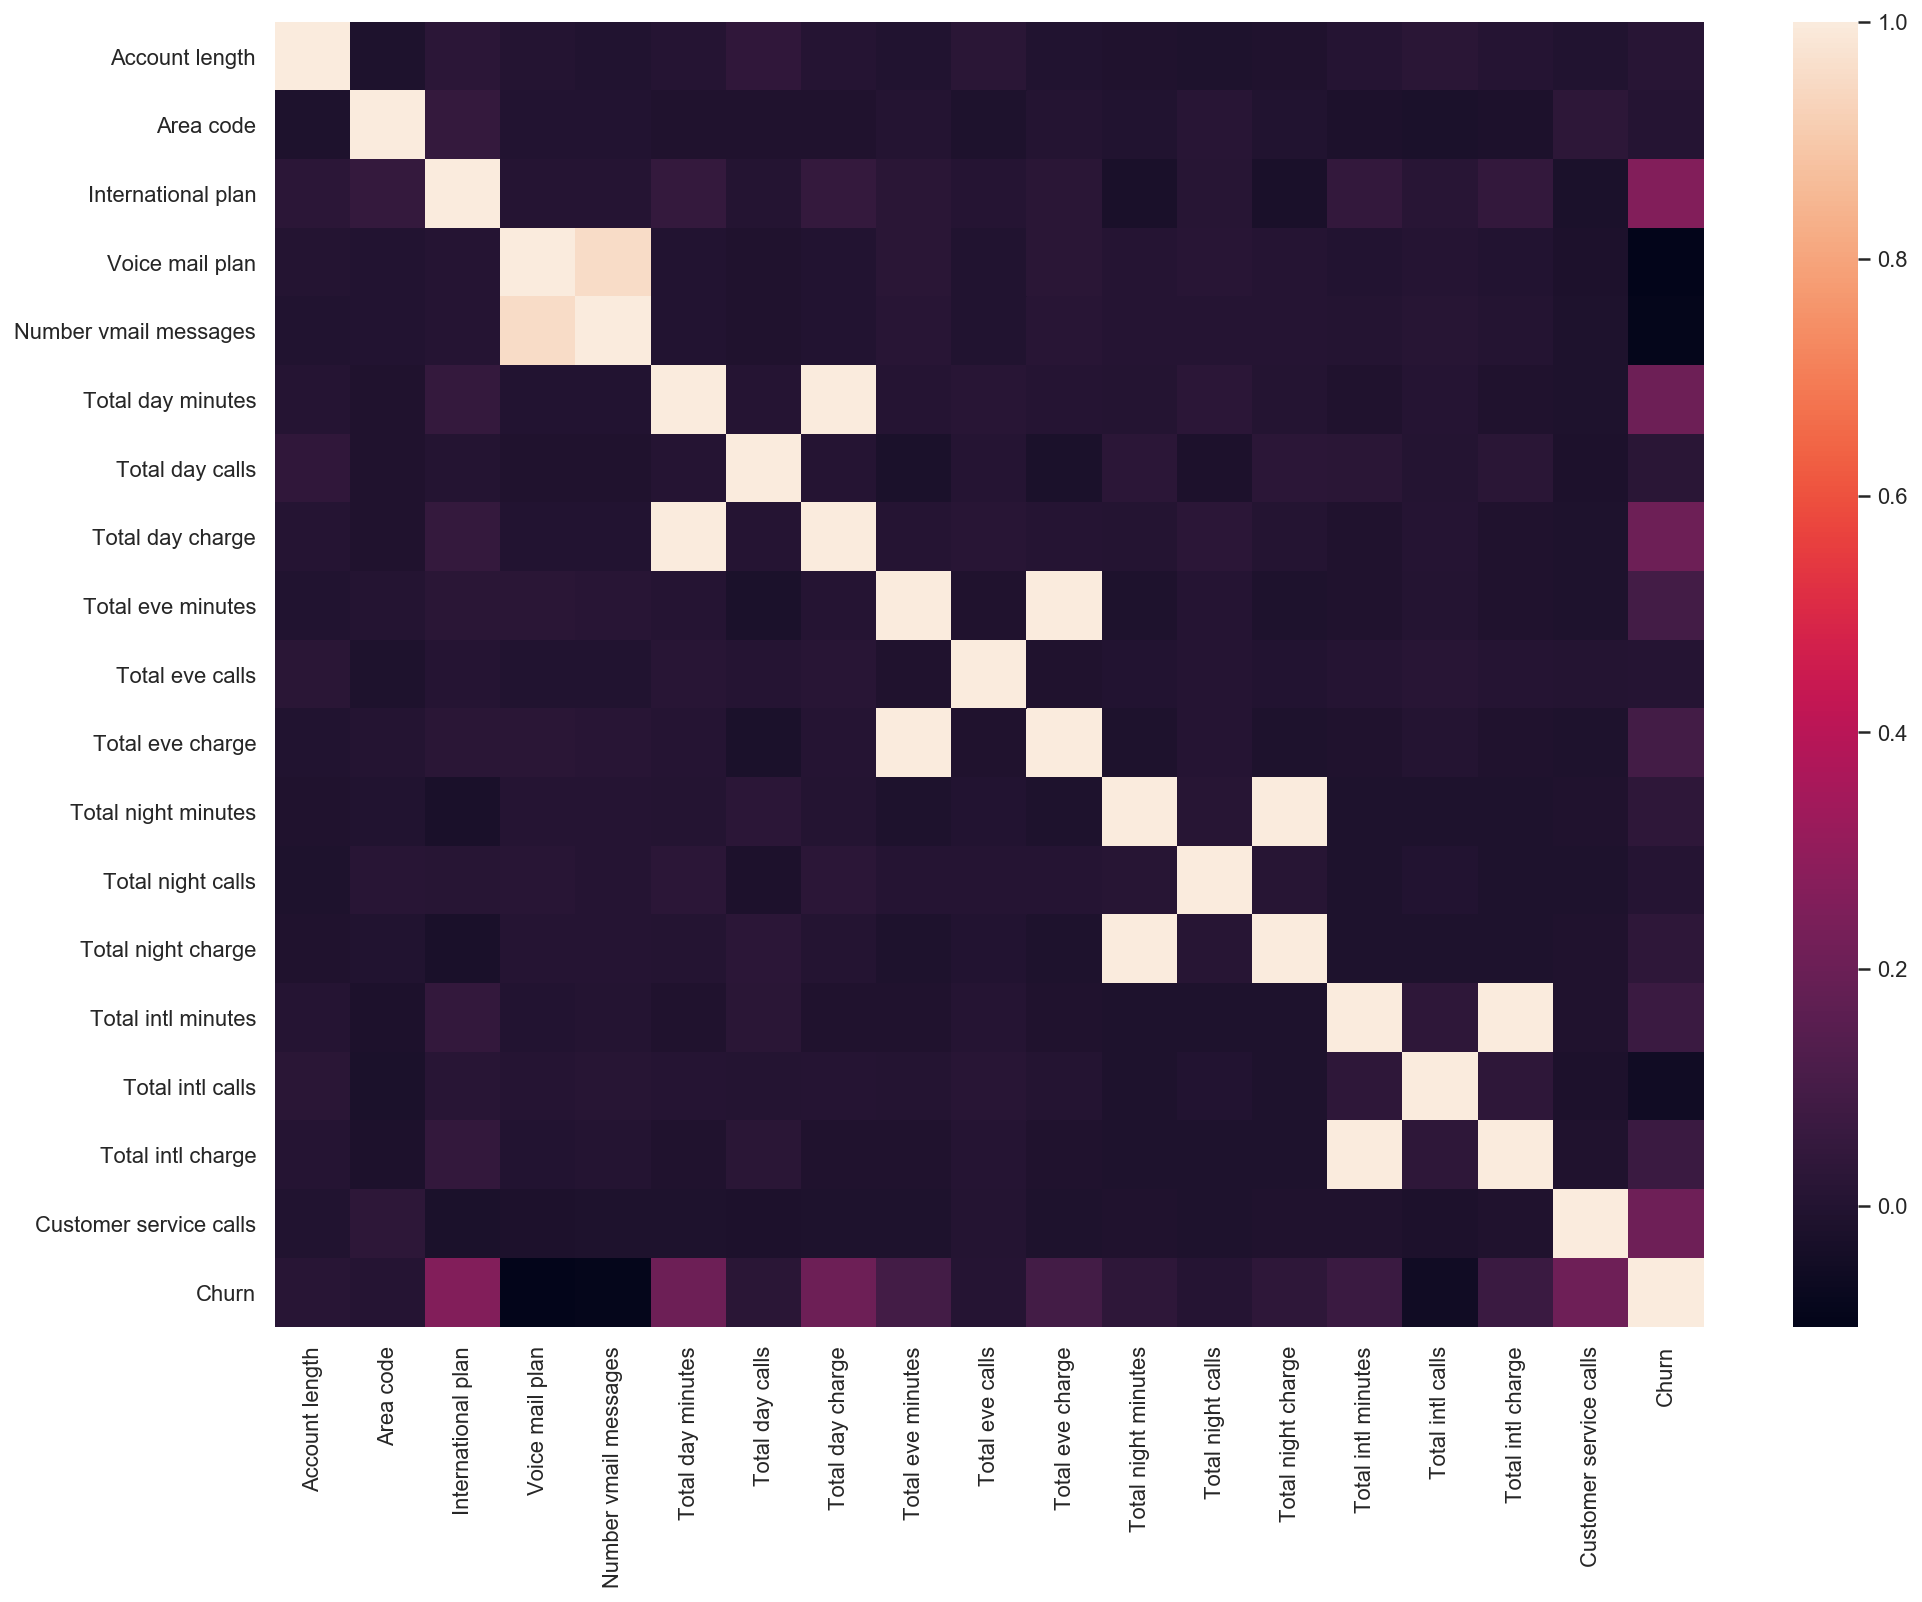

In [10]:
sns.heatmap(df.corr());

In [11]:
# Correlated features can be used by decision trees
# But they will be a problem for linear models
# 
# Also we should to drop all "charge" features because of correlation
# with "minute" features

In [12]:
charge_features = [feature for feature in df.columns \
                  if "charge" in feature]

charge_features

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [13]:
df.drop(charge_features, axis=1, inplace=True)

In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


## t-SNE
### (t-distributed Stoch Neighbor Embedding)
### We are trying to map our distribution in number_of_features-dimensial space on a plane (or sometimes 3D)

In [15]:
from sklearn.manifold import TSNE  # our t-SNE method
from sklearn.preprocessing import StandardScaler  # we will use it for data normalization

In [16]:
df.drop('State', axis=1, inplace=True)

In [17]:
# Data normalization process:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
print(df.shape)
print(df_scaled.shape)

(3333, 15)
(3333, 15)


In [19]:
# t-SNE representation construction

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(df_scaled)

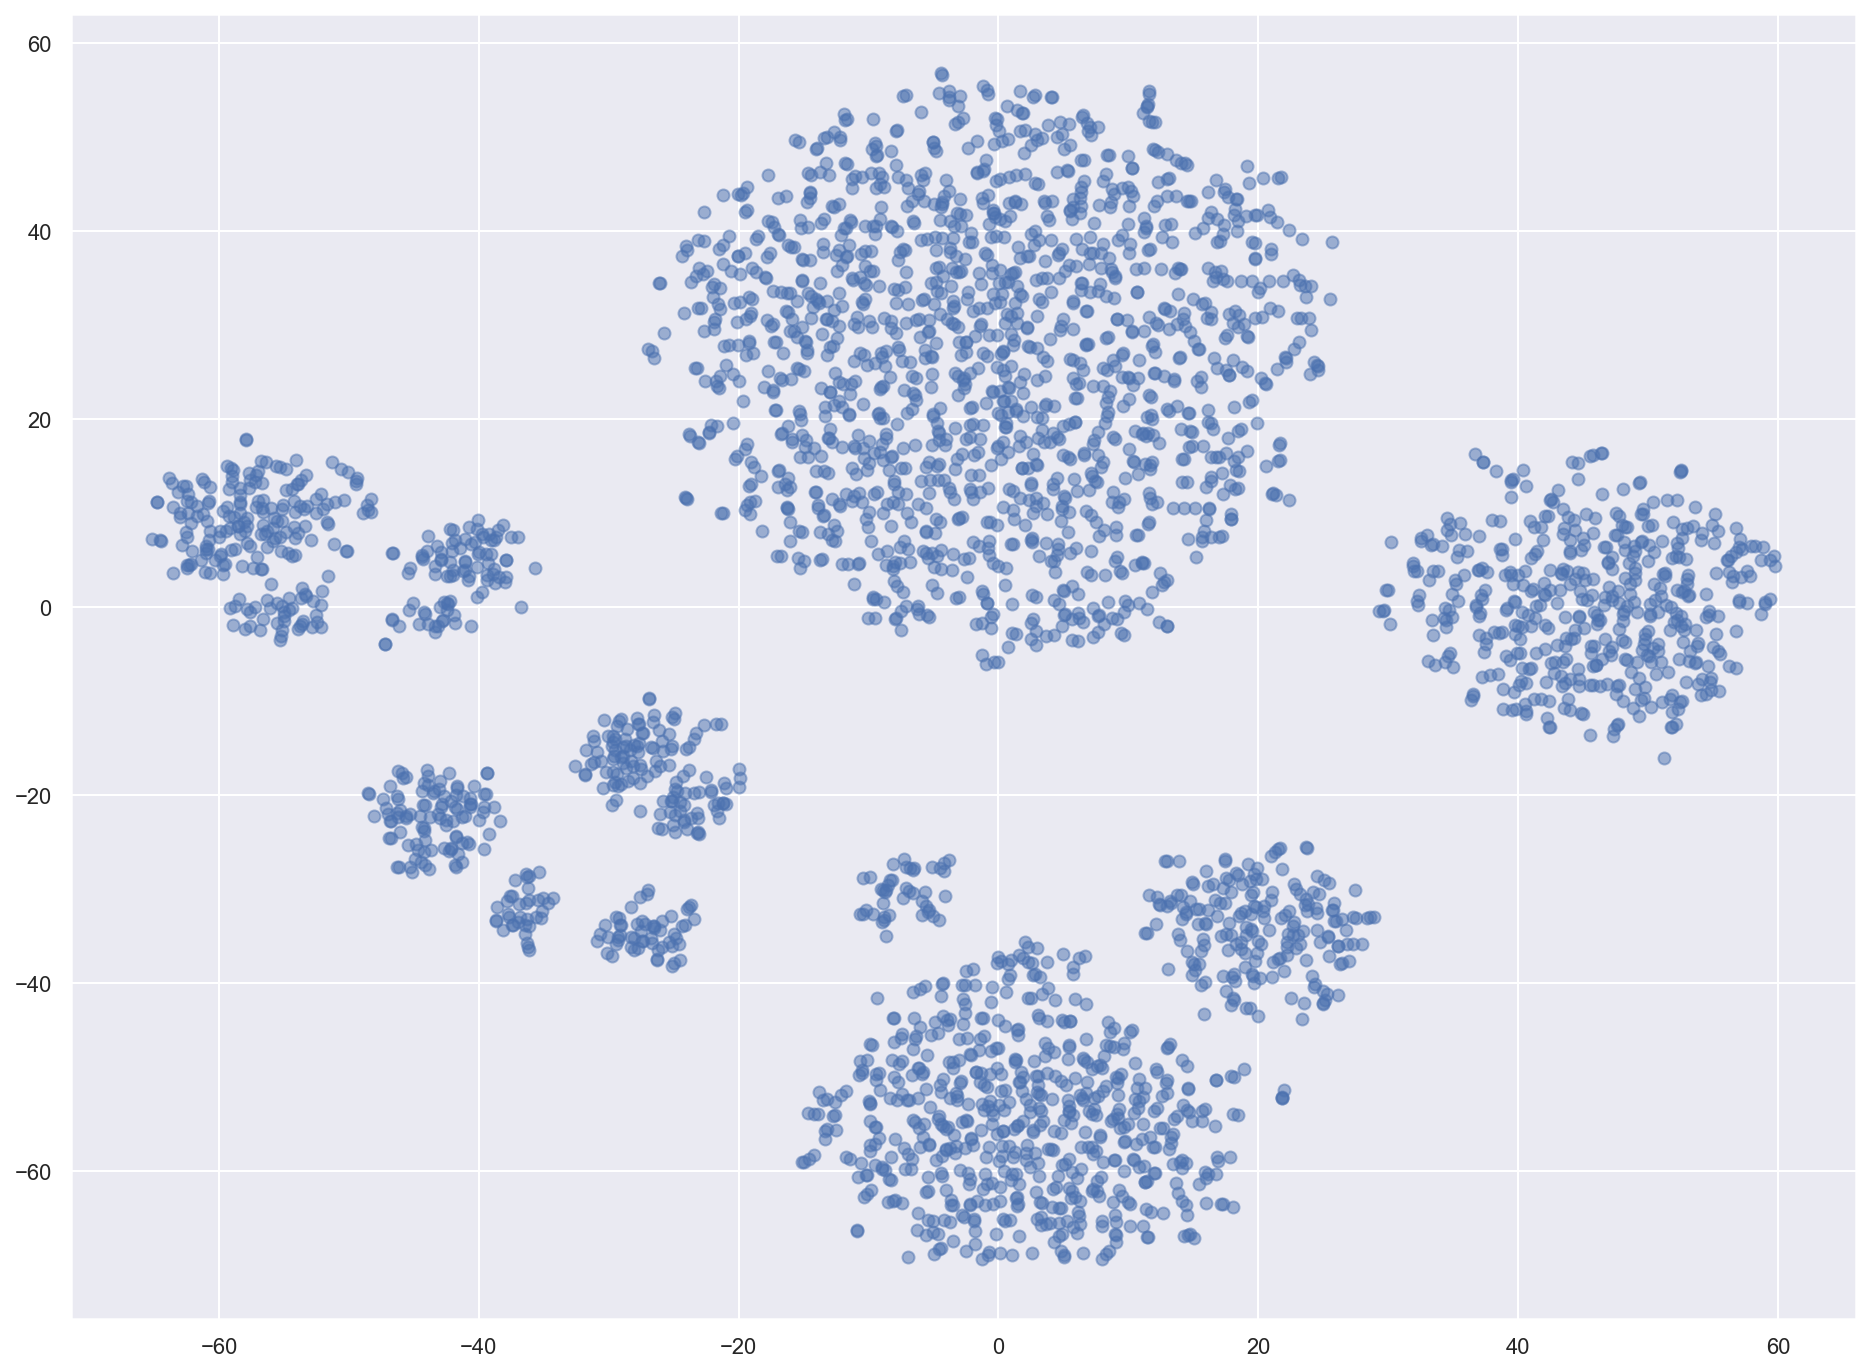

In [20]:
# plot of t-SNE representation

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

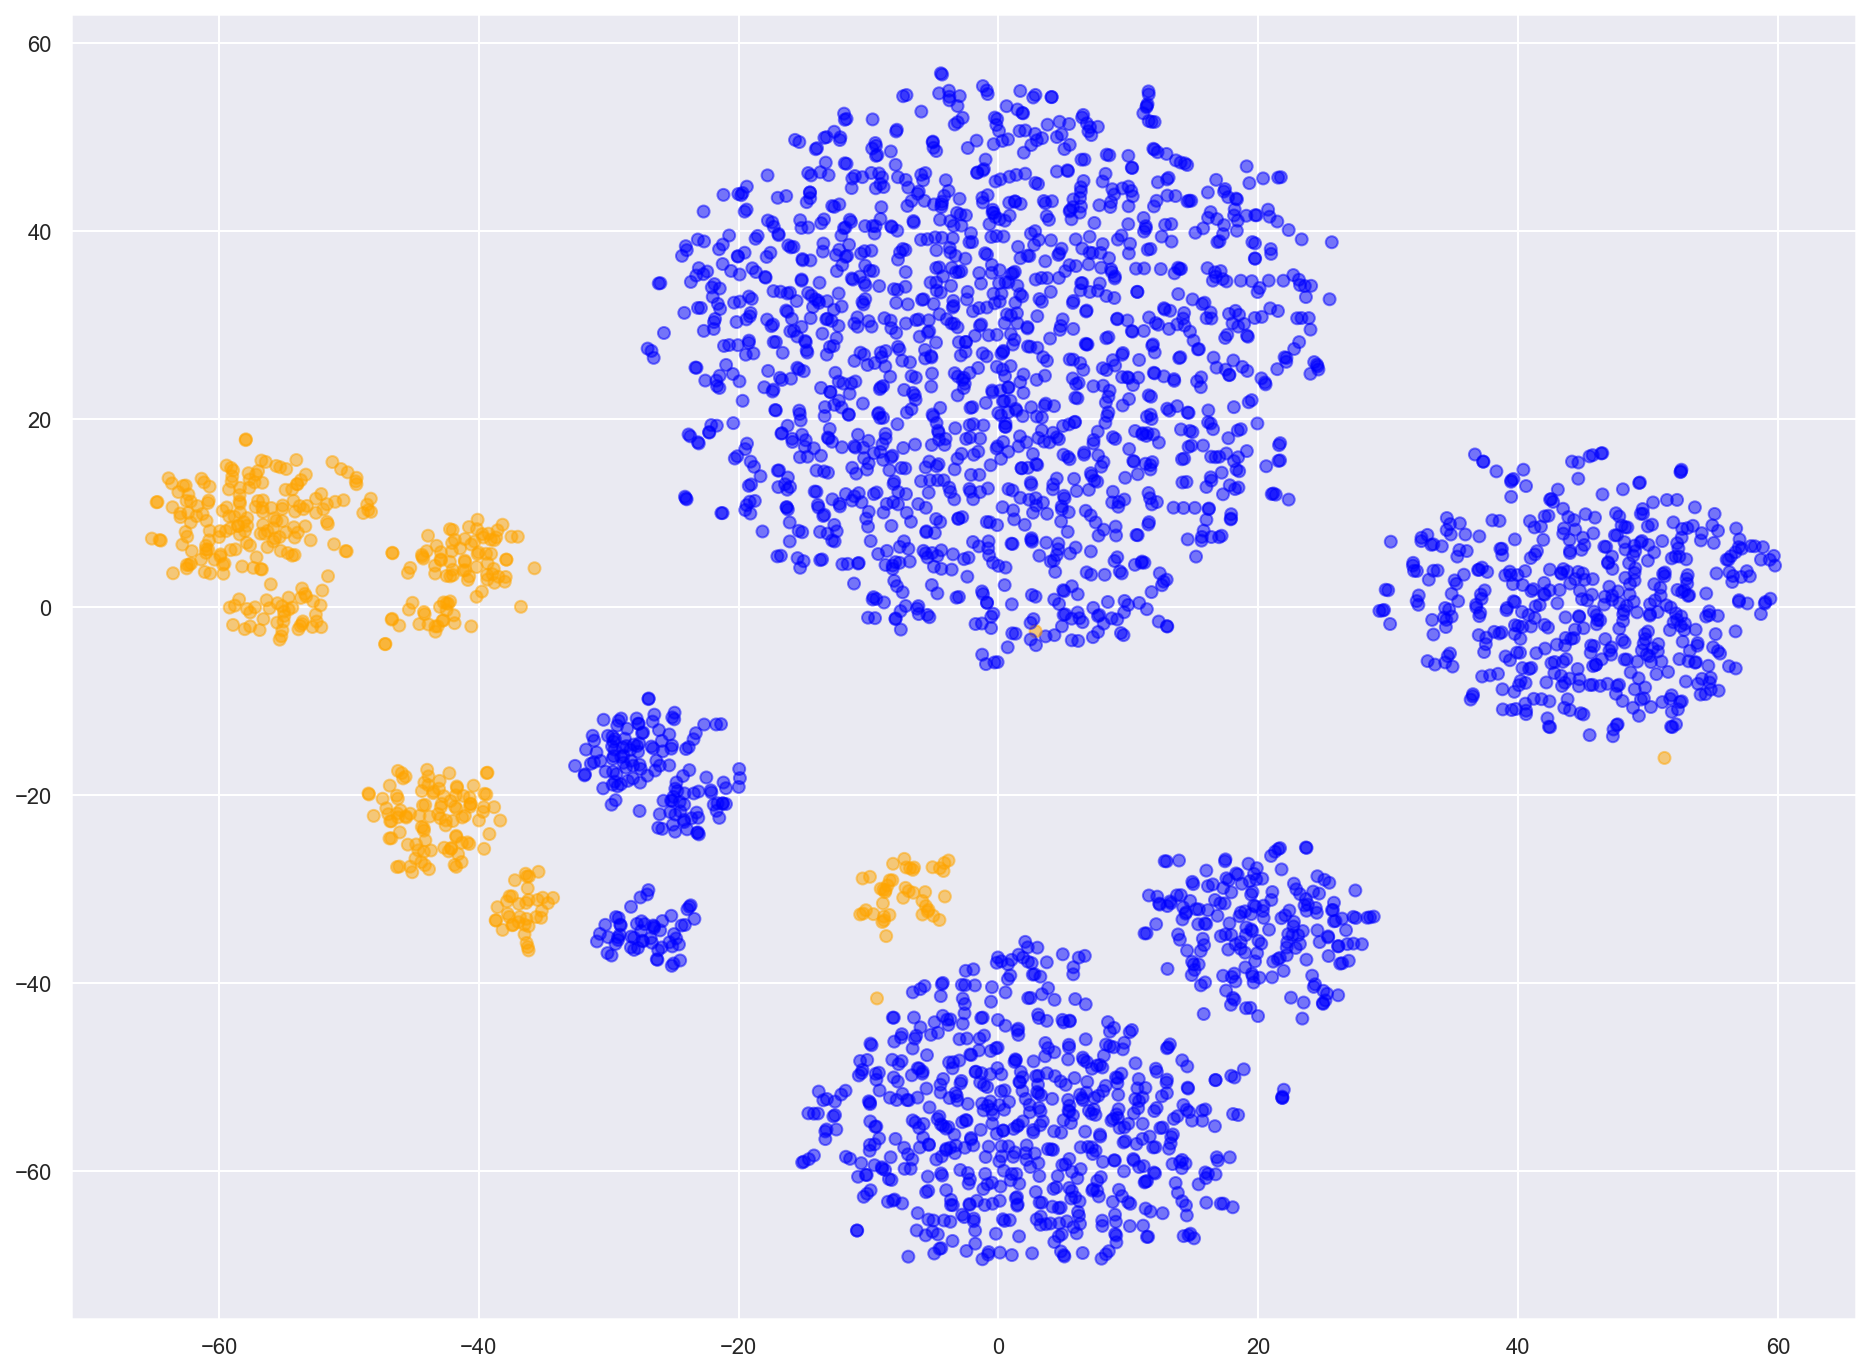

In [21]:
# Color it by Churn value: True-Churn - orange, else - blue

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

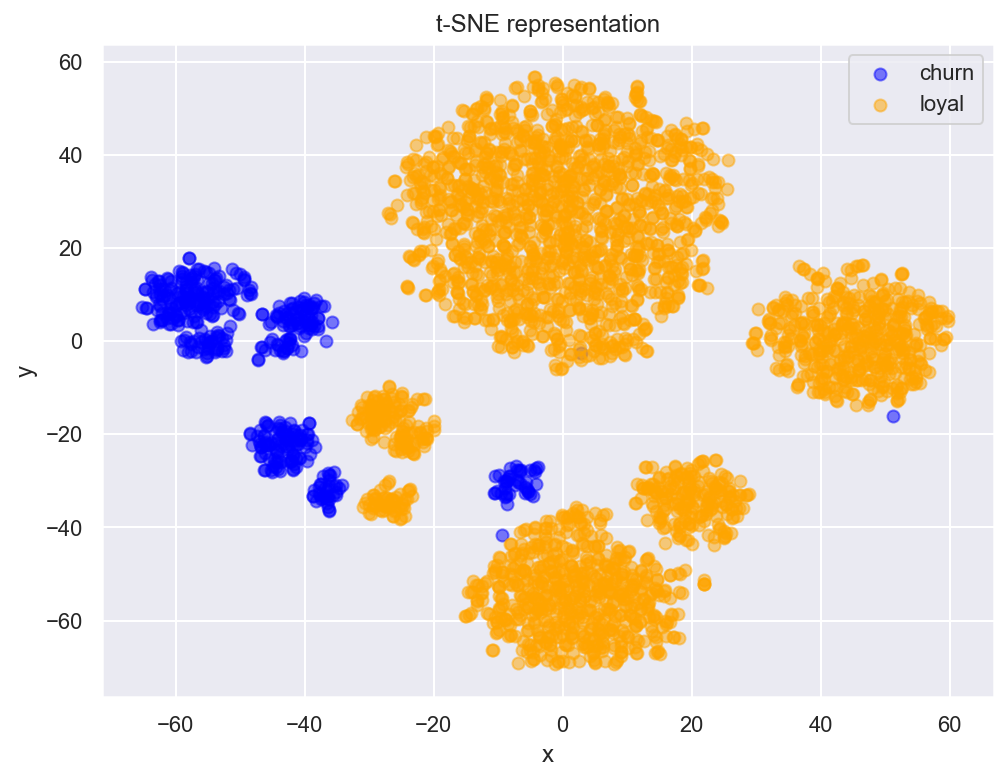

In [22]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.scatter(tsne_repr[df['Churn']==1, 0],
            tsne_repr[df['Churn']==1, 1], alpha=0.5, c='blue', 
            label='churn');
plt.scatter(tsne_repr[df['Churn']==0, 0],
            tsne_repr[df['Churn']==0, 1], alpha=0.5, c='orange', 
            label='loyal');

plt.title('t-SNE representation');
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## One feature at one time

### Numeric

In [27]:
plt.rcParams['figure.figsize'] = (8, 6)
df = pd.read_csv('./data/telecom_churn.csv')

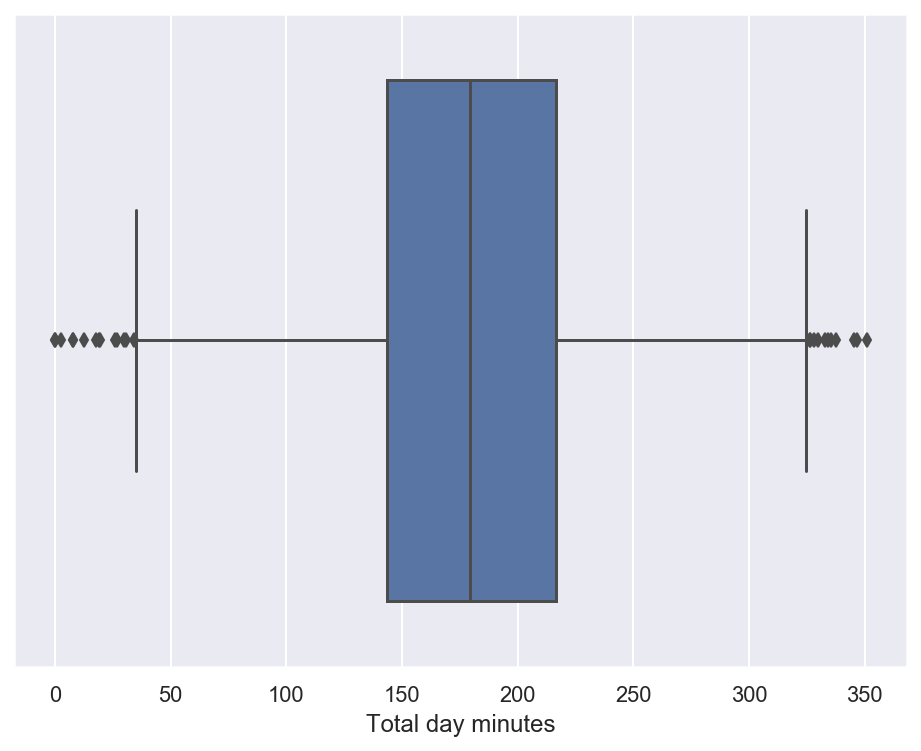

In [28]:
# box-plot

sns.boxplot(x='Total day minutes', data=df);

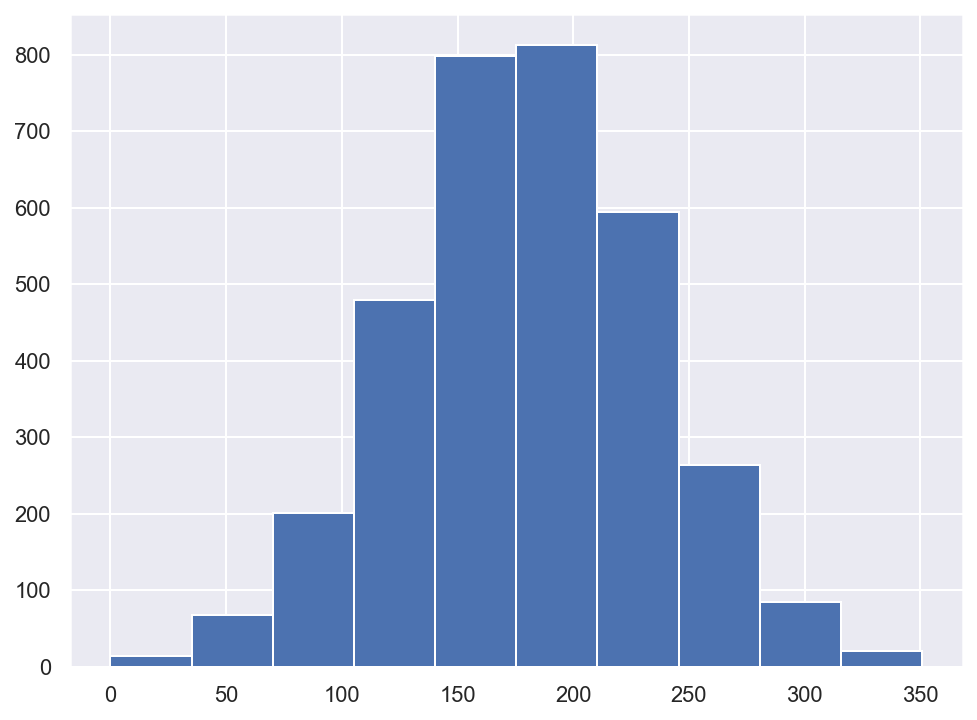

In [29]:
df['Total day minutes'].hist();

### Categorical

In [30]:
# Reinstalling df at first
df['Churn'] = df['Churn'].astype(int)
df['State'].nunique()

51

In [31]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [32]:
df.State.value_counts().head(10)

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
Name: State, dtype: int64

In [33]:
df.Churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

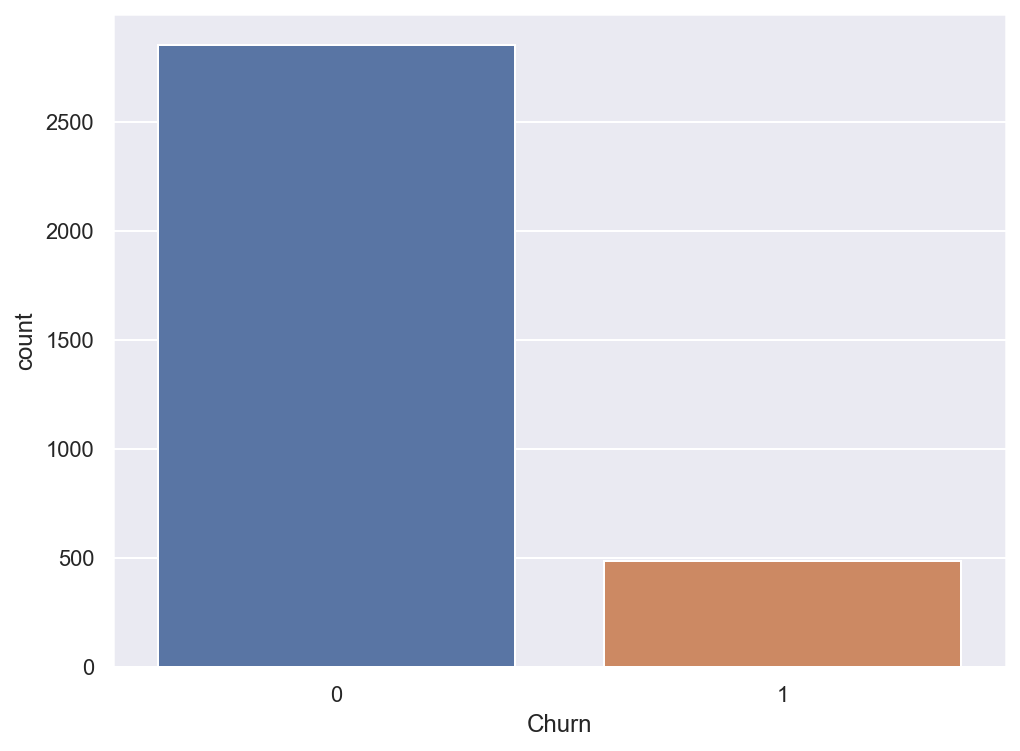

In [34]:
# Bar plot
sns.countplot(x='Churn', data=df);

## Interections between features

### Numeric-numeric

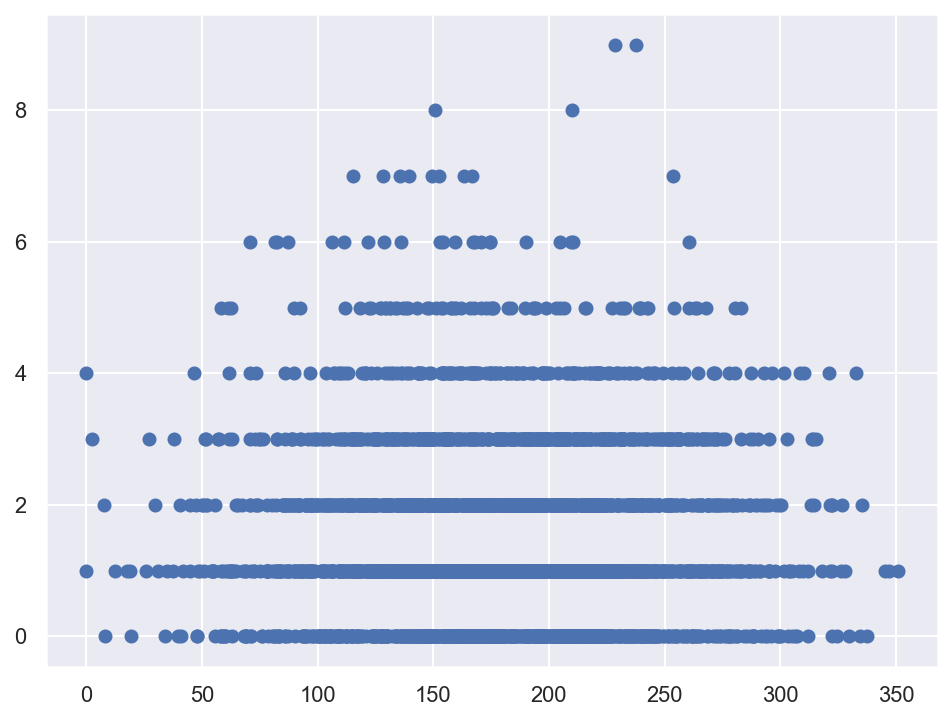

In [35]:
# Scatter-plot

plt.scatter(df['Total day minutes'], df['Customer service calls']);

In [36]:
states = df.State
df.drop('State', axis=1, inplace=True)

In [37]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total day charge          1.000000
Total eve minutes         0.007043
Total eve calls           0.015769
Total eve charge          0.007029
Total night minutes       0.004323
Total night calls         0.022972
Total night charge        0.004300
Total intl minutes       -0.010155
Total intl calls          0.008033
Total intl charge        -0.010092
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

### Categorical-categorical

In [38]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


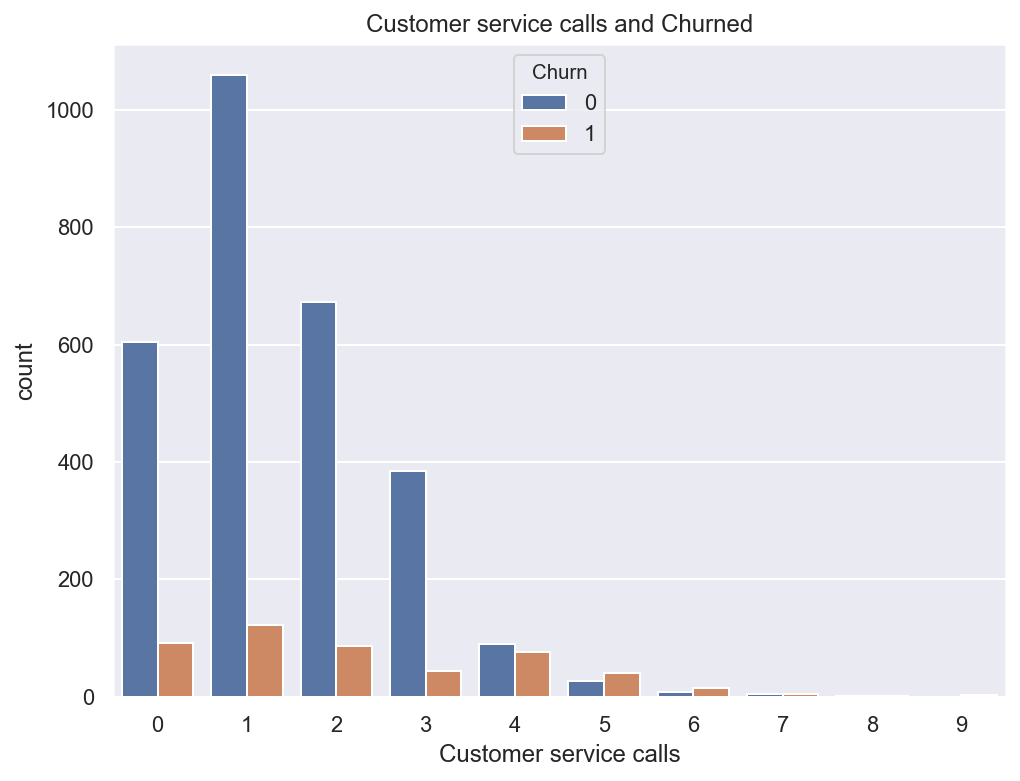

In [39]:
# Bar plots

sns.countplot(x='Customer service calls', data=df, hue='Churn');
plt.title('Customer service calls and Churned');

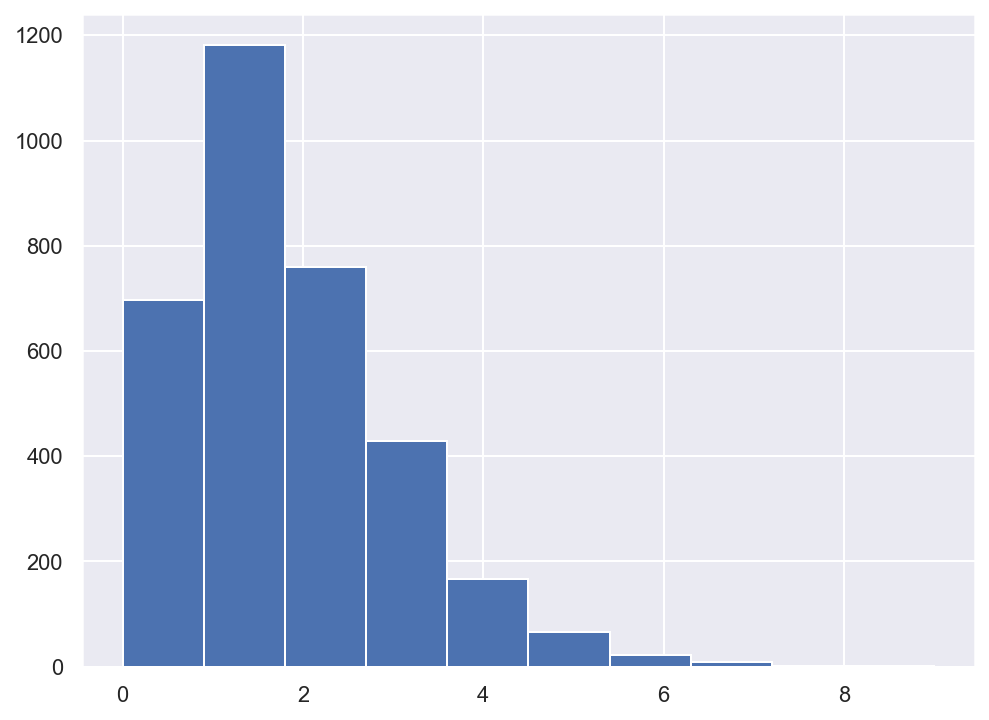

In [40]:
df['Customer service calls'].hist();

### Categorical-Numerical (not charts, but statistics)

In [41]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].mean()

,Total day minutes,Customer service calls
Churn,,
0,175.175754,1.449825
1,206.914079,2.229814


In [42]:
import numpy as np

In [43]:
df.groupby('Churn')['Total day minutes',
                    'Customer service calls'].agg([np.median,
                                                   np.std])

Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

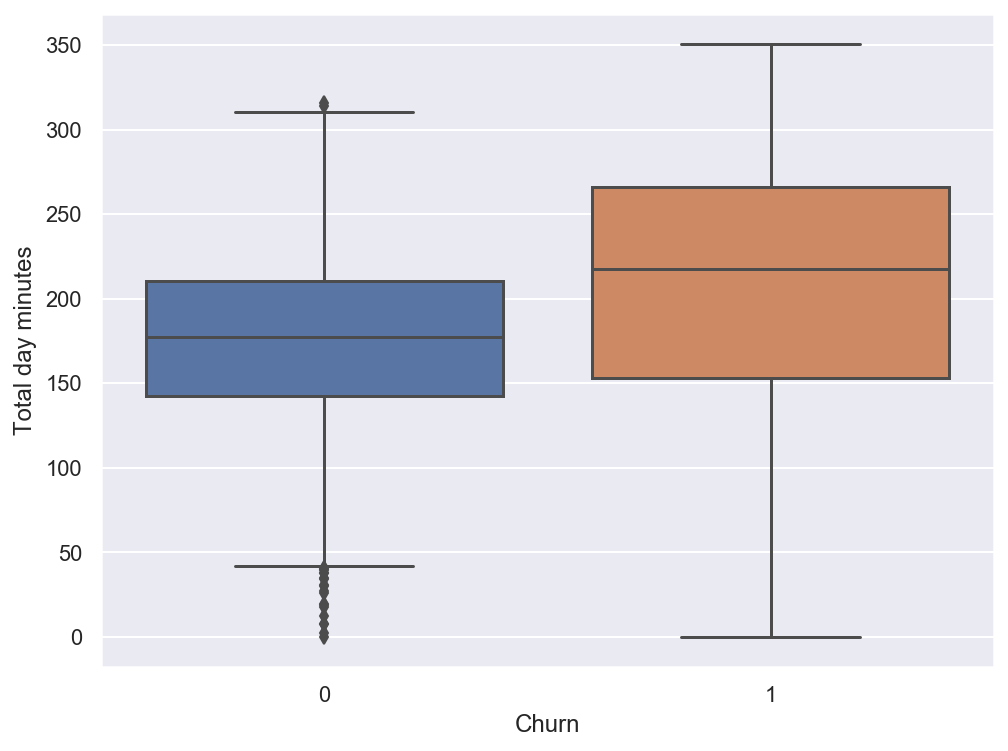

In [44]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);